<h1 style="color:purple">Iris flower classification</h1>

In [1]:
# import libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
iris_df = pd.read_csv("./Iris_data.csv")

In [3]:
# View the first few rows of the dataset
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.drop("Id", axis=1, inplace=True)

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<h2 style="color:orange">
From above we can see that there's no null values
</h2>

In [6]:
# Summary statistics
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Summary statistics include object datatype
iris_df.describe(include="object")

,Species
count,150
unique,3
top,Iris-setosa
freq,50


In [8]:
# Class distribution
class_counts = iris_df['Species'].value_counts()
print(class_counts)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


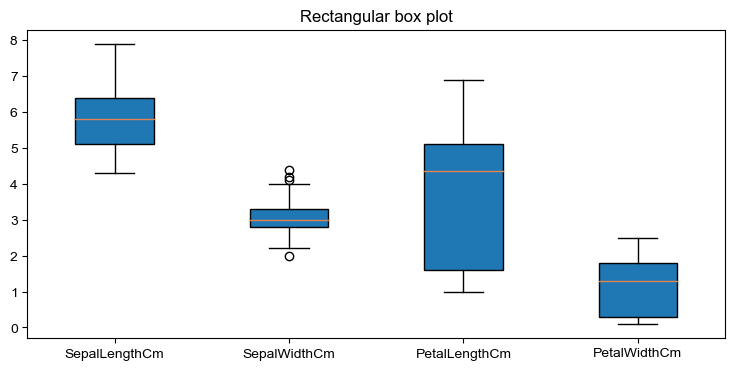

In [9]:
fig, ax = plt.subplots(nrows=1, figsize=(9, 4))
labels =['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
ax.boxplot(iris_df.drop("Species",axis=1),
                        labels=labels,
                        patch_artist=True)  # will be used to label x-ticks
ax.set_title('Rectangular box plot')
sns.set_theme()
%matplotlib inline

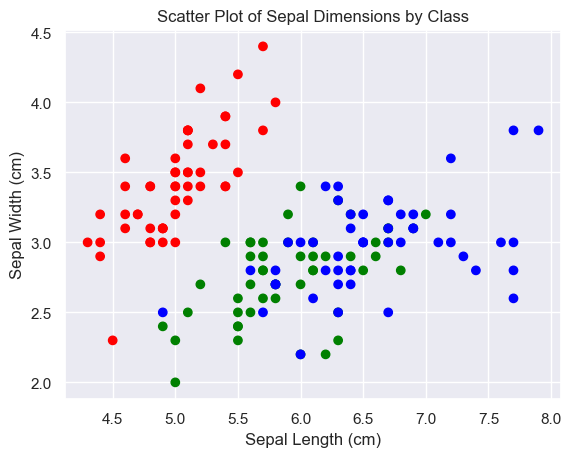

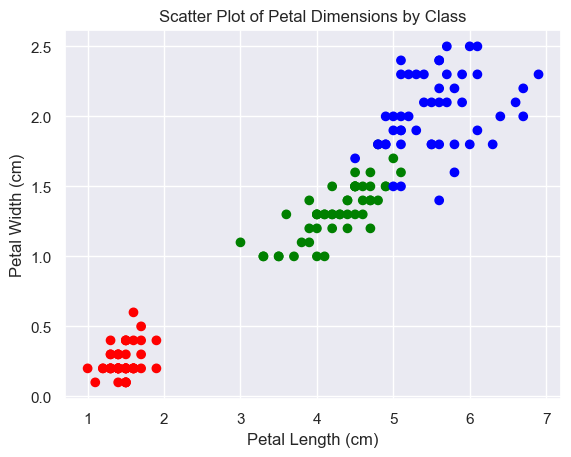

In [10]:
# Scatter plot by class
colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
plt.scatter(iris_df['SepalLengthCm'], iris_df['SepalWidthCm'], c=iris_df['Species'].map(colors))
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Sepal Dimensions by Class')
plt.show()

plt.scatter(iris_df['PetalLengthCm'], iris_df['PetalWidthCm'], c=iris_df['Species'].map(colors))
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter Plot of Petal Dimensions by Class')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [12]:
X = iris_df.drop("Species",axis=1)
y = iris_df["Species"]
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [13]:
def test_multiple_models(X, y, cv):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the models to test
    models = [
        ("Logistic Regression", LogisticRegression()),
        ("Decision Tree", DecisionTreeClassifier()),
        ("Random Forest", RandomForestClassifier()),
        ("Support Vector Machine", SVC())
    ]

    # Iterate over each model
    for name, model in models:
        # Perform cross-validation
        scores = cross_val_score(model, X_train, y_train, cv=cv)

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Model: {name}")
        print("Cross-Validation Accuracy:", scores.mean())
        print("Accuracy:", accuracy)

        report = classification_report(y_test, y_pred)
        print("Classification Report:\n", report)
        print("-----------------------------------------");

In [14]:
test_multiple_models(X,y,5)

c:\Users\Jarvis\.conda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Jarvis\.conda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Model: Logistic Regression
Cross-Validation Accuracy: 0.9666666666666666
Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

-----------------------------------------
Model: Decision Tree
Cross-Validation Accuracy: 0.9416666666666668
Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00       